In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [44]:
validation_results_path = '/home/b10173209/test.file/SS/validation_results1_linear_C_1.xlsx'
data = pd.read_excel(validation_results_path)

In [45]:
data['Emotion'] = data['Folder'].str.split('_').str[0]
print(data['Emotion'].head())

0    anger
1    anger
2    anger
3    anger
4    anger
Name: Emotion, dtype: object


In [46]:
emotions = data['Emotion'].unique() 
emotion_dataframes = {emotion: data[data['Emotion'] == emotion] for emotion in emotions} 

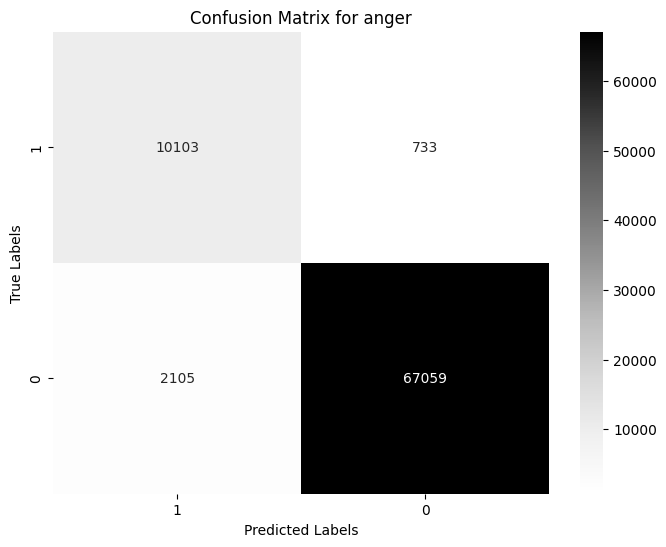

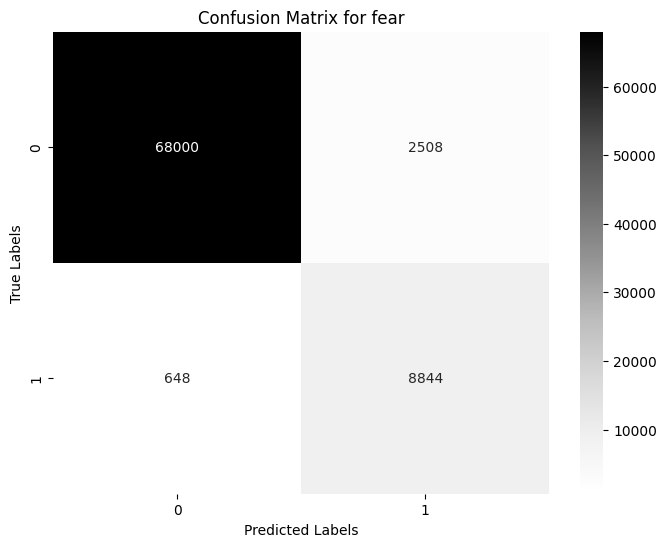

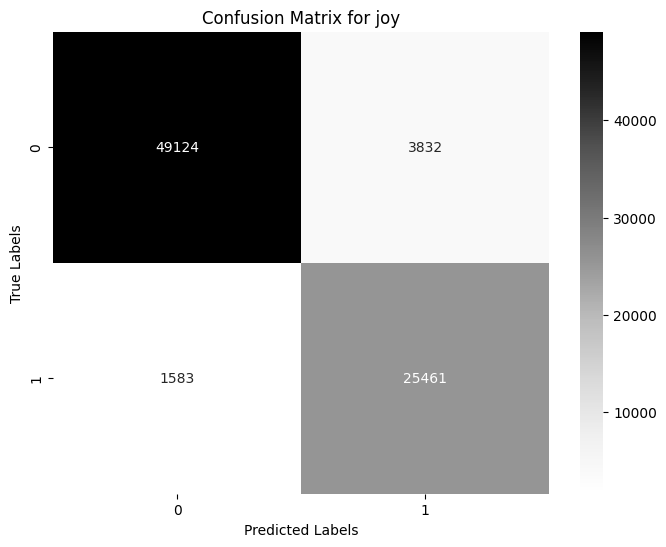

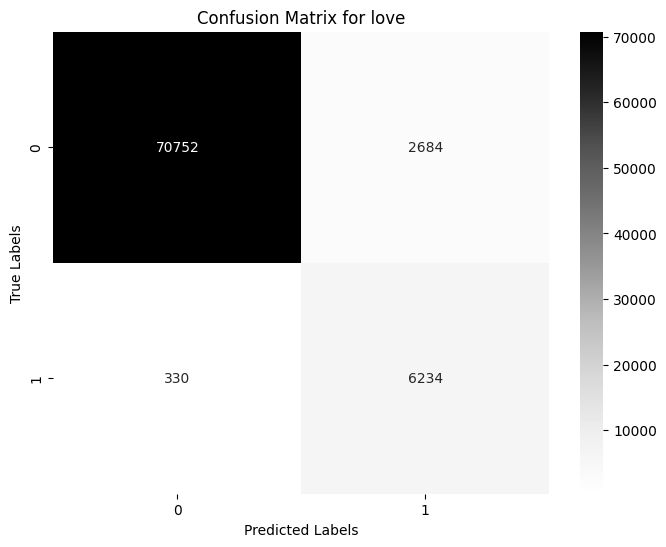

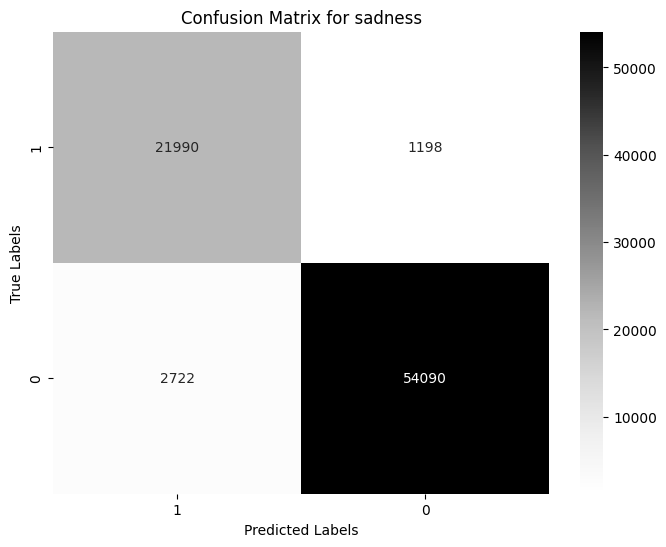

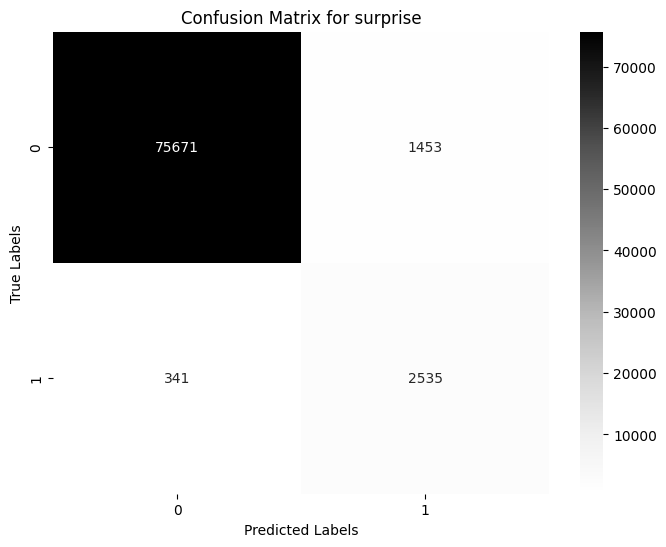

In [48]:
for emotion, df in emotion_dataframes.items():
    # 提取真實標籤和預測標籤
    true_labels = df['Labels']
    predicted_labels = df['Predictions']
    
    # 生成混淆矩陣
    cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())
    
    # 繪製混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
                xticklabels=true_labels.unique(), yticklabels=true_labels.unique())
    plt.title(f'Confusion Matrix for {emotion}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig(f'{emotion}_Confusion Matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
file_path = '/home/b10173209/test.file/SS/integrate_validation_results1_linear_C_1.xlsx'
data = pd.read_excel(file_path)

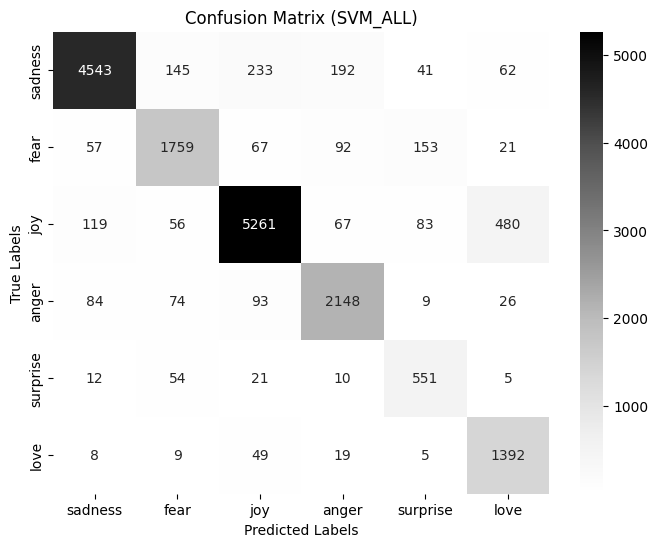

              precision    recall  f1-score   support

       anger       0.85      0.88      0.87      2434
        fear       0.84      0.82      0.83      2149
         joy       0.92      0.87      0.89      6066
        love       0.70      0.94      0.80      1482
     sadness       0.94      0.87      0.91      5216
    surprise       0.65      0.84      0.74       653

    accuracy                           0.87     18000
   macro avg       0.82      0.87      0.84     18000
weighted avg       0.88      0.87      0.87     18000



In [50]:
true_labels = data['Labels']
predicted_labels = data['Predictions']
cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=true_labels.unique(), yticklabels=true_labels.unique())
plt.title('Confusion Matrix (SVM_ALL)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('ALL_Confusion Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(classification_report(true_labels, predicted_labels))